In [2]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(stringr))
library(plyr)
library(purrr)
library(rstatix)
library(ggpubr)
library(ggrepel)

In [4]:
df<-read.csv('05_HAI/FC_phuket.csv')

In [5]:
df <- df %>% dplyr::mutate(`Age Group` = case_when(
  cohort.cohortGuid == "BR1" ~ "Young",
  cohort.cohortGuid == "BR2" ~ "Older",
  TRUE ~ NA_character_
))
df$`Age Group`<-factor(df$`Age Group`,levels=c("Young","Older"))

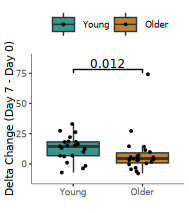

In [14]:
options(repr.plot.width = 40/25.4, repr.plot.height = 45/25.4)


p<-ggplot(df,aes(x=`Age Group`, y=fold_change, fill=`Age Group`)) +
   geom_boxplot(outlier.shape = NA,lwd=0.3) +
geom_point(position = position_jitter(width = 0.2),color="black", size=0.8,stroke=0) +
theme_classic(base_size=6)+  
stat_compare_means( label = "p.format",method='wilcox.test',paired=FALSE,size=2.5,
  comparisons = list(c("Older", "Young")))+  

    scale_fill_manual(values = c("Older" = '#bf812d', "Young" = '#35978f'))+
    scale_y_continuous(limits = c(NA, NA),
                       expand = expansion(mult = c(0.1, 0.15)))+
theme(legend.position="none")+
xlab('')+
ylab('Delta Change (Day 7 - Day 0)')+
theme(
panel.border = element_blank())   + 
    theme(axis.line = element_line(colour = "black", linewidth = 0.1),
          legend.position = "top",
          legend.title = element_blank(),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_blank(),
          panel.background = element_blank(),
          axis.title.x = element_text(margin = margin(t = 1)))
p
ggsave('FigureK.pdf',p,width = 40/25.4,height = 45/25.4)